In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Model 2. Decision Tree Regression

In [37]:
GOOGL = pd.read_csv('data/GOOGL.csv').rename(columns={'4. close':'GOOGL close'})
AMZN = pd.read_csv('data/AMZN.csv').rename(columns={'4. close':'AMZN close'})
AAPL = pd.read_csv('data/AAPL.csv').rename(columns={'4. close':'AAPL close'})
META = pd.read_csv('data/META.csv').rename(columns={'4. close':'META close'})
MSFT = pd.read_csv('data/MSFT.csv').rename(columns={'4. close':'MSFT close'})

In [38]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [39]:
#Response and Predictor
X = pd.concat([AMZN["AMZN close"], AAPL["AAPL close"], 
               META["META close"], MSFT["MSFT close"]], axis=1)
y = GOOGL["GOOGL close"]

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeRegressor(max_depth=3)  # create the decision tree object
dectree.fit(X_train, y_train)  # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

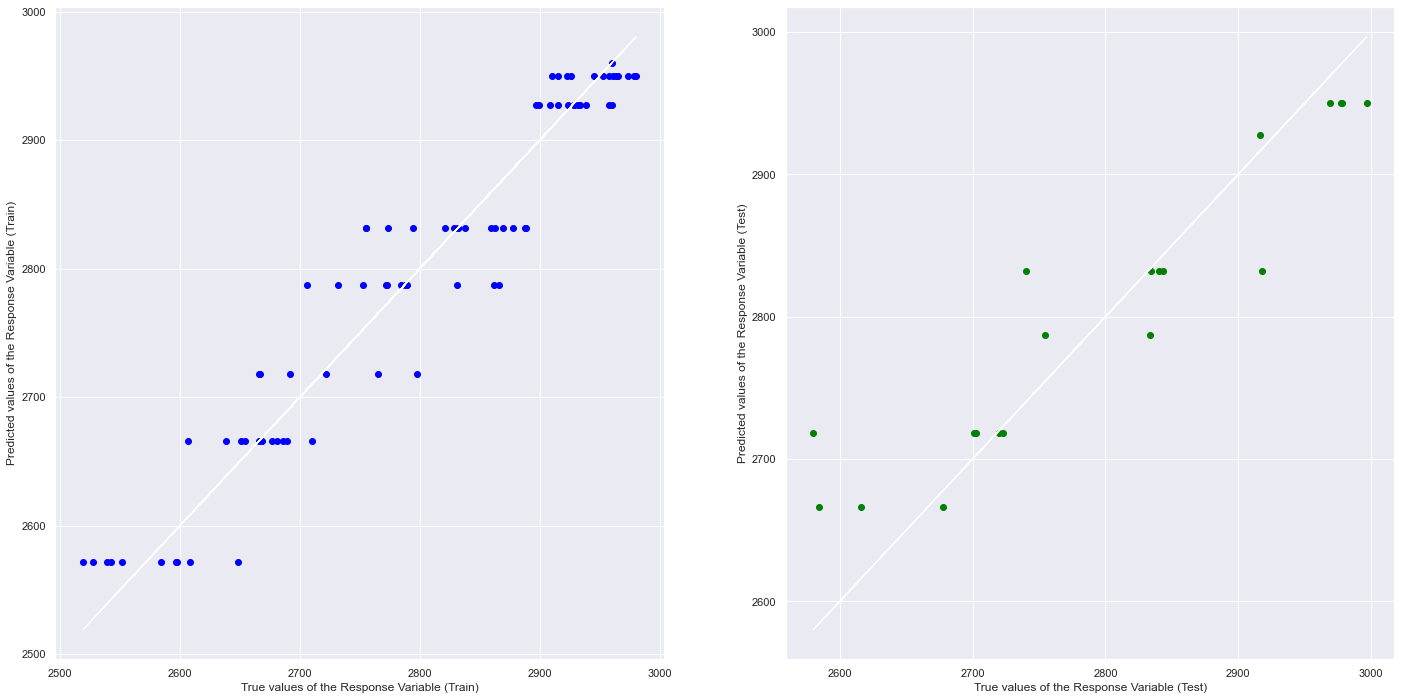

In [44]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

[Text(558.0, 570.7800000000001, 'MSFT close <= 311.095\nmse = 17627.762\nsamples = 80\nvalue = 2798.168'),
 Text(279.0, 407.70000000000005, 'MSFT close <= 298.235\nmse = 8345.346\nsamples = 38\nvalue = 2684.369'),
 Text(139.5, 244.62, 'MSFT close <= 288.495\nmse = 3364.943\nsamples = 21\nvalue = 2620.98'),
 Text(69.75, 81.53999999999996, 'mse = 1573.384\nsamples = 10\nvalue = 2571.343'),
 Text(209.25, 81.53999999999996, 'mse = 717.644\nsamples = 11\nvalue = 2666.104'),
 Text(418.5, 244.62, 'AAPL close <= 170.995\nmse = 3402.133\nsamples = 17\nvalue = 2762.675'),
 Text(348.75, 81.53999999999996, 'mse = 2427.404\nsamples = 6\nvalue = 2718.25'),
 Text(488.25, 81.53999999999996, 'mse = 2270.146\nsamples = 11\nvalue = 2786.906'),
 Text(837.0, 407.70000000000005, 'MSFT close <= 331.51\nmse = 3708.498\nsamples = 42\nvalue = 2901.129'),
 Text(697.5, 244.62, 'AMZN close <= 3118.02\nmse = 2737.851\nsamples = 16\nvalue = 2839.814'),
 Text(627.75, 81.53999999999996, 'mse = 0.0\nsamples = 1\nvalue 

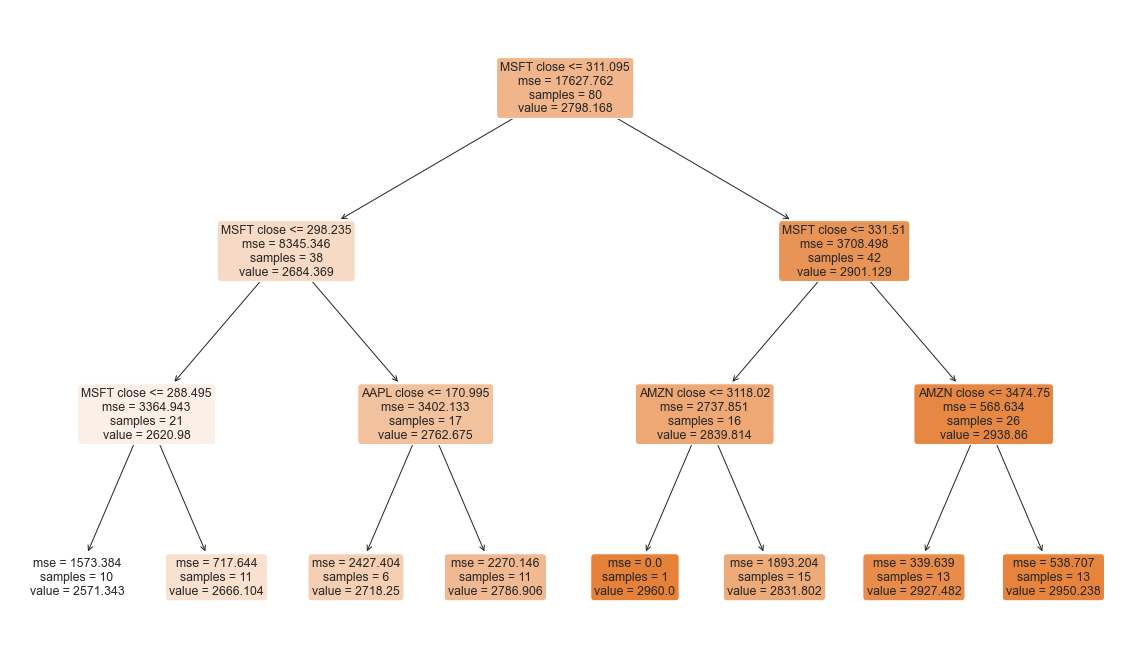

In [42]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(20,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns)

The only variables that are important in predicting close price of Google are close prices of Microsoft, Apple and Amozon. In particular, close price of Microsoft is the most important variable to predict close price of Google.

In [46]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1287.256429488637

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 2613.3484248706072



The decision tree regression model has similar MSE as the linear regression model. Hence, both models are good in predicting the close price of Google.